**1.0 Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        #Visualisation
import seaborn as sns                  #Visualisation
%matplotlib inline

**1.1 Reading the dataset** 

In [ ]:
train = pd.read_csv("train.csv")
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
test = pd.read_csv("test.csv")
test.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [ ]:
train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


**1.2 Information about the dataset**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [ ]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(train['text'])

7613

In [ ]:
len(train)

7613

**1.3 Plotting of the Racist and Non-racist tweets in the dataset**

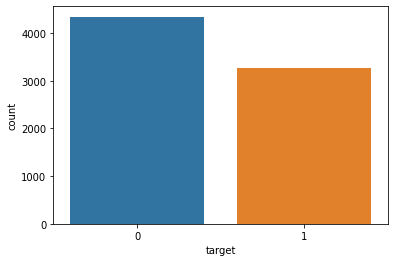

In [ ]:
sns.countplot(train['target'])

**1.4 Removing Null values from the columns of the dataset**

In [ ]:
train= train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5080 entries, 31 to 7581
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5080 non-null   int64 
 1   keyword   5080 non-null   object
 2   location  5080 non-null   object
 3   text      5080 non-null   object
 4   target    5080 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 238.1+ KB


In [ ]:
# check if there are any missing values
train.isnull().sum()
#train.isnull().values.any()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [ ]:
print(" The shape of train is:", train.shape)

 The shape of train is: (5080, 5)


In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

l = len(train)
train.drop_duplicates(subset='text', inplace=True)
print("Total Duplicates ", l - len(train))

Total Duplicates  52


**Data cleaning**

In [ ]:
import re

# helper function
def clean_text(text):
    te = str(text).encode('ascii','ignore').decode('UTF-8')
    te = re.sub(r'@[\w]+', '', te)
    te = re.sub(r'https?://t.co/[\w]+', '', te)
    te = re.sub(r'#', '', te)
    te = re.sub(r"RT @[\w]+:",'',te)
    te = re.sub(r"RT @[\w]+:",'',te)
    te = re.sub(r" RT ",'',te)
    te = re.sub(r"https://[\w]+.[\w]+/[\w]+",'',te)
    te = re.sub(r"[][]",'',te)
    te = re.sub(r"&amp","and", te)
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", te)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Transform each text into a vector of word counts
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_text,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(train.text)
training_features

<5028x41421 sparse matrix of type '<class 'numpy.float64'>'
	with 79073 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Transform each text into a vector of word counts
vectorizer2 = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_text,
                             ngram_range=(1, 2))

training_features = vectorizer2.fit_transform(test.text)
training_features

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import precision_score, recall_score, make_scorer, f1_score, accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

# extract the labels from the train data
y = train.target.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(train.clean_text.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

In [ ]:
#install tweet-preprocessor to clean tweets
!pip install tweet-preprocessor

In [ ]:
# remove special characters using the regular expression library
import re

#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [ ]:
import preprocessor as p

# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [ ]:
# clean training data
train_tweet = clean_tweets(train["tweet"])
train_tweet = pd.DataFrame(train_tweet)

In [ ]:
# append cleaned tweets to the training data
train["clean_tweet"] = train_tweet

# compare the cleaned and uncleaned tweets
train.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now
5,6,0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before they ...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so


**Test and Train split**

In [ ]:
from sklearn.model_selection import train_test_split

# extract the labels from the train data
y = train.label.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(train.clean_tweet.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

In [ ]:
corpus = train["clean_tweet"]
corpus.tail()

31956    NaN
31957    NaN
31958    NaN
31959    NaN
31961    NaN
Name: clean_tweet, dtype: object

In [ ]:
corpus = corpus.values.tolist()
corpus

['when a father is dysfunctional and is so selfish he drags his kids into his dysfunction',
 'thanks for credit i cant use cause they dont offer wheelchair vans in pdx',
 'bihday your majesty',
 'i love u take with u all the time in ur',
 'factsguide society now',
 '2 2 huge fan fare and big talking before they leave chaos and pay disputes when they get there',
 'camping tomorrow danny',
 'the next school year is the year for exams cant think about that',
 'we won love the land',
 'welcome here  im its so ',
 'consumer price index mom climbed from previous  to  in may',
 'we are so selfish',
 'i get to see my daddy today',
 'calls middle school build the wall chant ',
 'no comment in',
 'ouchjunior is angry',
 'i am thankful for having a paner',
 'retweet if you agree',
 'its  smiles all around via ig user make people',
 'as we all know essential oils are not made of chemicals',
 'people blaming ha for conceded goal was it fat rooney who gave away free kick knowing bale can hit them fr

In [ ]:
type(corpus)

list

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(use_idf= True,stop_words="english",
                             ngram_range=(1, 2))

In [ ]:
sample=['this is a sentence is',
        'this is another sentence',
        'third document is here']


In [ ]:
sample_vects=tfidf_vect.fit_transform(sample)

In [ ]:
print(tfidf_vect.get_feature_names())

['document', 'sentence']


In [ ]:
sample_vects

<3x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
sample_vects.toarray()

array([[0., 1.],
       [0., 1.],
       [1., 0.]])

In [ ]:
#place tf-idf values in a pandas data frame
for i in range(0,len(sample)):
  df = pd.DataFrame(sample_vects[i].T.todense(),index = tfidf_vect.get_feature_names(), columns =["tfidf"])
df.sort_values(by=["tfidf"],ascending= False)

,tfidf
document,1.0
sentence,0.0


In [ ]:
import pandas as pd
j=0
for i in range():
    df = pd.DataFrame(sample_vects.T.todense(),columns=tfidf_vect.get_feature_names())
df

ValueError: ignored

In [ ]:
corpus

['when a father is dysfunctional and is so selfish he drags his kids into his dysfunction',
 'thanks for credit i cant use cause they dont offer wheelchair vans in pdx',
 'bihday your majesty',
 'i love u take with u all the time in ur',
 'factsguide society now',
 '2 2 huge fan fare and big talking before they leave chaos and pay disputes when they get there',
 'camping tomorrow danny',
 'the next school year is the year for exams cant think about that',
 'we won love the land',
 'welcome here  im its so ',
 'consumer price index mom climbed from previous  to  in may',
 'we are so selfish',
 'i get to see my daddy today',
 'calls middle school build the wall chant ',
 'no comment in',
 'ouchjunior is angry',
 'i am thankful for having a paner',
 'retweet if you agree',
 'its  smiles all around via ig user make people',
 'as we all know essential oils are not made of chemicals',
 'people blaming ha for conceded goal was it fat rooney who gave away free kick knowing bale can hit them fr

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(use_idf= True)

In [ ]:
corpus_vects=tfidf_vect.fit_transform(corpus)

print(tfidf_vect.get_feature_names())

['00', '000', '0099', '00am', '00pm', '01', '0143hr', '02', '03', '039', '04', '04k', '04pm', '05', '0506823156', '06', '061116', '08', '09', '09053111156', '09062016', '0k', '10', '100', '1000', '1000s', '100k', '1024x589', '10k', '10pm', '11', '1130am', '11am', '11pm', '12', '12000', '123', '1235', '125', '1260', '1280', '13', '1300', '138k', '13am', '14', '14000', '146540383315', '146548350793', '146549118088', '146551855923', '14655211716', '146553966006', '146559416364', '146561573275', '146562489121', '146566806708', '146566878899', '14657299921', '146574845042', '146587684966', '146601580087', '146604726015', '146611754356', '146613099097', '146613148779', '146614684803', '146616195126', '146625485594', '146625748002', '146627813527', '146631675197', '146631964117', '146632324152', '146635635817', '146635779606', '146636043542', '146638873624', '14m', '14weeks', '15', '15am', '15s', '15th', '16', '1621', '16th', '17', '17112014', '17500', '18', '1800', '1803', '1861', '1882', '1

In [ ]:
corpus_vects.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#place tf-idf values in a pandas data frame
df = pd.DataFrame(corpus_vects.T.todense(),index = tfidf_vect.get_feature_names(), columns =["tfidf"])
df.sort_values(by=["tfidf"],ascending= False)

ValueError: ignored

In [ ]:
for i in range(0,len(sample_data)):
  df = pd.DataFrame(sample_data_vects.T.todense(),index = tfidf_vect.get_feature_names(), columns =["tfidf"])
  df.sort_values(by=["tfidf"],ascending= False)

ValueError: ignored

In [ ]:
#place tf-idf values in a pandas data frame
df = pd.DataFrame(sample_data_vects.T.todense(),index = tfidf_vect.get_feature_names(), columns =["tfidf"])
df.sort_values(by=["tfidf"],ascending= False)

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

# extract the labels from the train data
y = x.label.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(x.clean_tweet.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

In [ ]:
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = 64)
print("score: %.2f" % (score))
print("The accuracy model training is: %.2f" % (acc*100))


6/6 - 0s - loss: 1.4140 - accuracy: 0.7667
score: 1.41
The accuracy model training is: 76.67


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

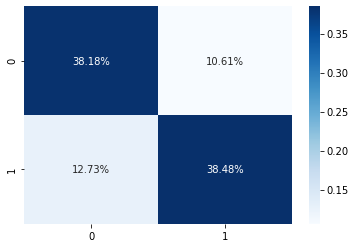

In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77       161
         1.0       0.78      0.75      0.77       169

    accuracy                           0.77       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.77      0.77      0.77       330

